In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import matplotlib as mpl
import sklearn
import warnings
warnings.filterwarnings("ignore")
from sklearn.preprocessing import LabelEncoder
from scipy.stats import boxcox

In [2]:
df=pd.read_csv("census_income.csv")

In [3]:
df

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32555,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32556,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32557,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32558,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32560 entries, 0 to 32559
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Age             32560 non-null  int64 
 1   Workclass       32560 non-null  object
 2   Fnlwgt          32560 non-null  int64 
 3   Education       32560 non-null  object
 4   Education_num   32560 non-null  int64 
 5   Marital_status  32560 non-null  object
 6   Occupation      32560 non-null  object
 7   Relationship    32560 non-null  object
 8   Race            32560 non-null  object
 9   Sex             32560 non-null  object
 10  Capital_gain    32560 non-null  int64 
 11  Capital_loss    32560 non-null  int64 
 12  Hours_per_week  32560 non-null  int64 
 13  Native_country  32560 non-null  object
 14  Income          32560 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [5]:
df.describe()

,Age,Fnlwgt,Education_num,Capital_gain,Capital_loss,Hours_per_week
count,32560.000000,3.256000e+04,32560.000000,32560.000000,32560.000000,32560.000000
mean,38.581634,1.897818e+05,10.080590,1077.615172,87.306511,40.437469
std,13.640642,1.055498e+05,2.572709,7385.402999,402.966116,12.347618
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178315e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783630e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370545e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


In [6]:
df.describe(include="all")

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
count,32560.000000,32560,3.256000e+04,32560,32560.000000,32560,32560,32560,32560,32560,32560.000000,32560.000000,32560.000000,32560,32560
unique,NaN,9,NaN,16,NaN,7,15,6,5,2,NaN,NaN,NaN,42,2
top,NaN,Private,NaN,HS-grad,NaN,Married-civ-spouse,Prof-specialty,Husband,White,Male,NaN,NaN,NaN,United-States,<=50K
freq,NaN,22696,NaN,10501,NaN,14976,4140,13193,27815,21789,NaN,NaN,NaN,29169,24719
mean,38.581634,NaN,1.897818e+05,NaN,10.080590,NaN,NaN,NaN,NaN,NaN,1077.615172,87.306511,40.437469,NaN,NaN
std,13.640642,NaN,1.055498e+05,NaN,2.572709,NaN,NaN,NaN,NaN,NaN,7385.402999,402.966116,12.347618,NaN,NaN
min,17.000000,NaN,1.228500e+04,NaN,1.000000,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,1.000000,NaN,NaN
25%,28.000000,NaN,1.178315e+05,NaN,9.000000,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,40.000000,NaN,NaN
50%,37.000000,NaN,1.783630e+05,NaN,10.000000,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,40.000000,NaN,NaN
75%,48.000000,NaN,2.370545e+05,NaN,12.000000,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,45.000000,NaN,NaN


Age               0
Workclass         0
Fnlwgt            0
Education         0
Education_num     0
Marital_status    0
Occupation        0
Relationship      0
Race              0
Sex               0
Capital_gain      0
Capital_loss      0
Hours_per_week    0
Native_country    0
Income            0
dtype: int64


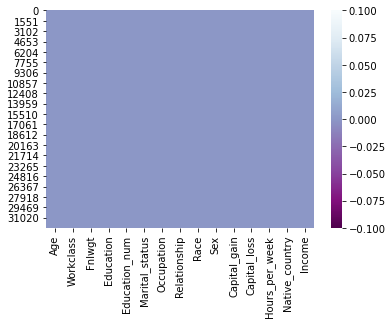

In [7]:
#checking missing values again 
sns.heatmap(df.isnull(),cmap="BuPu_r")
print  (df.isnull().sum())

In [8]:
df.keys()

Index(['Age', 'Workclass', 'Fnlwgt', 'Education', 'Education_num',
       'Marital_status', 'Occupation', 'Relationship', 'Race', 'Sex',
       'Capital_gain', 'Capital_loss', 'Hours_per_week', 'Native_country',
       'Income'],
      dtype='object')

In [9]:
#checking for non relevalnt columns
df.sample(9)

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
31691,48,Private,207982,Some-college,10,Never-married,Other-service,Unmarried,Black,Female,0,0,40,United-States,<=50K
28308,24,Private,121023,Bachelors,13,Never-married,Prof-specialty,Not-in-family,White,Female,0,0,40,United-States,<=50K
19315,21,Private,400635,Some-college,10,Never-married,Other-service,Not-in-family,White,Female,0,0,20,?,<=50K
2007,28,Private,246595,HS-grad,9,Never-married,Craft-repair,Own-child,White,Male,0,0,70,United-States,<=50K
23264,34,Private,340458,HS-grad,9,Divorced,Machine-op-inspct,Unmarried,White,Female,0,0,40,United-States,<=50K
30871,46,Private,117310,Assoc-acdm,12,Widowed,Tech-support,Unmarried,White,Female,6497,0,40,United-States,<=50K
30784,24,Private,315476,Assoc-acdm,12,Never-married,Craft-repair,Own-child,White,Male,0,0,40,United-States,<=50K
24085,25,Private,208591,HS-grad,9,Never-married,Machine-op-inspct,Own-child,White,Male,0,0,40,United-States,<=50K
2521,46,Private,133169,Assoc-voc,11,Married-civ-spouse,Craft-repair,Husband,White,Male,0,0,40,United-States,<=50K


In [10]:
df["Occupation"].unique()

array([' Exec-managerial', ' Handlers-cleaners', ' Prof-specialty',
       ' Other-service', ' Adm-clerical', ' Sales', ' Craft-repair',
       ' Transport-moving', ' Farming-fishing', ' Machine-op-inspct',
       ' Tech-support', ' ?', ' Protective-serv', ' Armed-Forces',
       ' Priv-house-serv'], dtype=object)

In [11]:
print  (df.isnull().sum())

Age               0
Workclass         0
Fnlwgt            0
Education         0
Education_num     0
Marital_status    0
Occupation        0
Relationship      0
Race              0
Sex               0
Capital_gain      0
Capital_loss      0
Hours_per_week    0
Native_country    0
Income            0
dtype: int64


In [12]:
df.shape

(32560, 15)

In [13]:
for i in df:
    print ( i , df[i].unique() )

Age [50 38 53 28 37 49 52 31 42 30 23 32 40 34 25 43 54 35 59 56 19 39 20 45
 22 48 21 24 57 44 41 29 18 47 46 36 79 27 67 33 76 17 55 61 70 64 71 68
 66 51 58 26 60 90 75 65 77 62 63 80 72 74 69 73 81 78 88 82 83 84 85 86
 87]
Workclass [' Self-emp-not-inc' ' Private' ' State-gov' ' Federal-gov' ' Local-gov'
 ' ?' ' Self-emp-inc' ' Without-pay' ' Never-worked']
Fnlwgt [ 83311 215646 234721 ...  34066  84661 257302]
Education [' Bachelors' ' HS-grad' ' 11th' ' Masters' ' 9th' ' Some-college'
 ' Assoc-acdm' ' Assoc-voc' ' 7th-8th' ' Doctorate' ' Prof-school'
 ' 5th-6th' ' 10th' ' 1st-4th' ' Preschool' ' 12th']
Education_num [13  9  7 14  5 10 12 11  4 16 15  3  6  2  1  8]
Marital_status [' Married-civ-spouse' ' Divorced' ' Married-spouse-absent'
 ' Never-married' ' Separated' ' Married-AF-spouse' ' Widowed']
Occupation [' Exec-managerial' ' Handlers-cleaners' ' Prof-specialty'
 ' Other-service' ' Adm-clerical' ' Sales' ' Craft-repair'
 ' Transport-moving' ' Farming-fishing' ' Machine-o

In [14]:
 df.nunique(dropna=False) 

Age                  73
Workclass             9
Fnlwgt            21647
Education            16
Education_num        16
Marital_status        7
Occupation           15
Relationship          6
Race                  5
Sex                   2
Capital_gain        119
Capital_loss         92
Hours_per_week       94
Native_country       42
Income                2
dtype: int64

<AxesSubplot:>

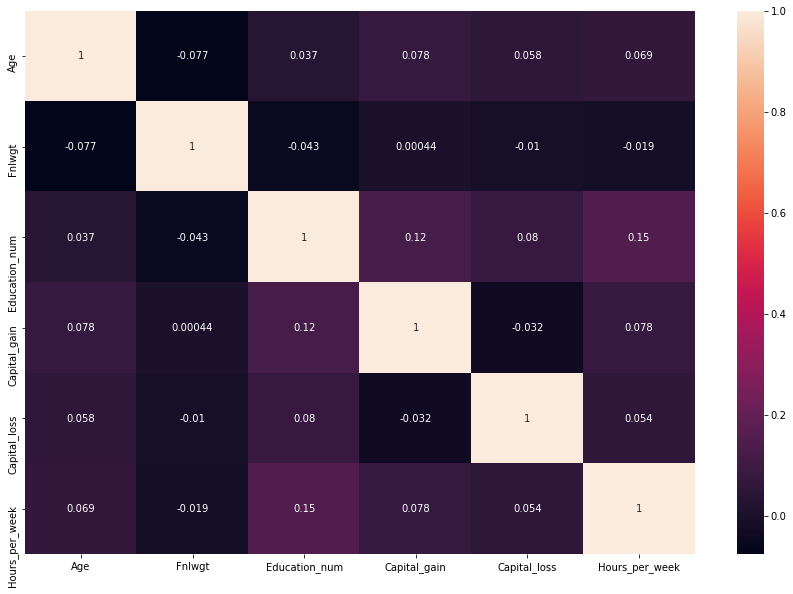

In [15]:
cor=df.corr()
plt.figure(figsize=(15,10))
sns.heatmap(cor,annot=True)

In [16]:
df.skew()

Age                0.558738
Fnlwgt             1.446972
Education_num     -0.311630
Capital_gain      11.953690
Capital_loss       4.594549
Hours_per_week     0.227636
dtype: float64

In [17]:
column_list=[]
for i in df:
    column_list.append (i)
column_list



#encoding all the columns 
le=LabelEncoder()

for val in column_list:
    df[val]=le.fit_transform(df[val].astype(str))
    #astype describes that the data present are in str format
df

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
0,33,6,20690,9,4,2,4,0,4,1,0,0,4,39,0
1,21,4,10268,11,15,0,6,1,4,1,0,0,34,39,0
2,36,4,11553,1,13,2,6,0,2,1,0,0,34,39,0
3,11,4,16170,9,4,2,10,5,2,0,0,0,34,5,0
4,20,4,14135,12,5,2,4,5,4,0,0,0,34,39,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32555,10,4,12825,7,3,2,13,5,4,0,0,0,31,39,0
32556,23,4,4223,11,15,2,7,0,4,1,0,0,34,39,1
32557,41,4,4026,11,15,6,1,4,4,0,0,0,34,39,0
32558,5,4,9041,11,15,4,1,3,4,1,0,0,12,39,0


In [18]:
#cheking the dtype 
df.dtypes

Age               int32
Workclass         int32
Fnlwgt            int32
Education         int32
Education_num     int32
Marital_status    int32
Occupation        int32
Relationship      int32
Race              int32
Sex               int32
Capital_gain      int32
Capital_loss      int32
Hours_per_week    int32
Native_country    int32
Income            int32
dtype: object

Age                  AxesSubplot(0.125,0.657941;0.133621x0.222059)
Workclass         AxesSubplot(0.285345,0.657941;0.133621x0.222059)
Fnlwgt             AxesSubplot(0.44569,0.657941;0.133621x0.222059)
Education         AxesSubplot(0.606034,0.657941;0.133621x0.222059)
Education_num     AxesSubplot(0.766379,0.657941;0.133621x0.222059)
Marital_status       AxesSubplot(0.125,0.391471;0.133621x0.222059)
Occupation        AxesSubplot(0.285345,0.391471;0.133621x0.222059)
Relationship       AxesSubplot(0.44569,0.391471;0.133621x0.222059)
Race              AxesSubplot(0.606034,0.391471;0.133621x0.222059)
Sex               AxesSubplot(0.766379,0.391471;0.133621x0.222059)
Capital_gain            AxesSubplot(0.125,0.125;0.133621x0.222059)
Capital_loss         AxesSubplot(0.285345,0.125;0.133621x0.222059)
Hours_per_week        AxesSubplot(0.44569,0.125;0.133621x0.222059)
Native_country       AxesSubplot(0.606034,0.125;0.133621x0.222059)
Income               AxesSubplot(0.766379,0.125;0.133621x0.222

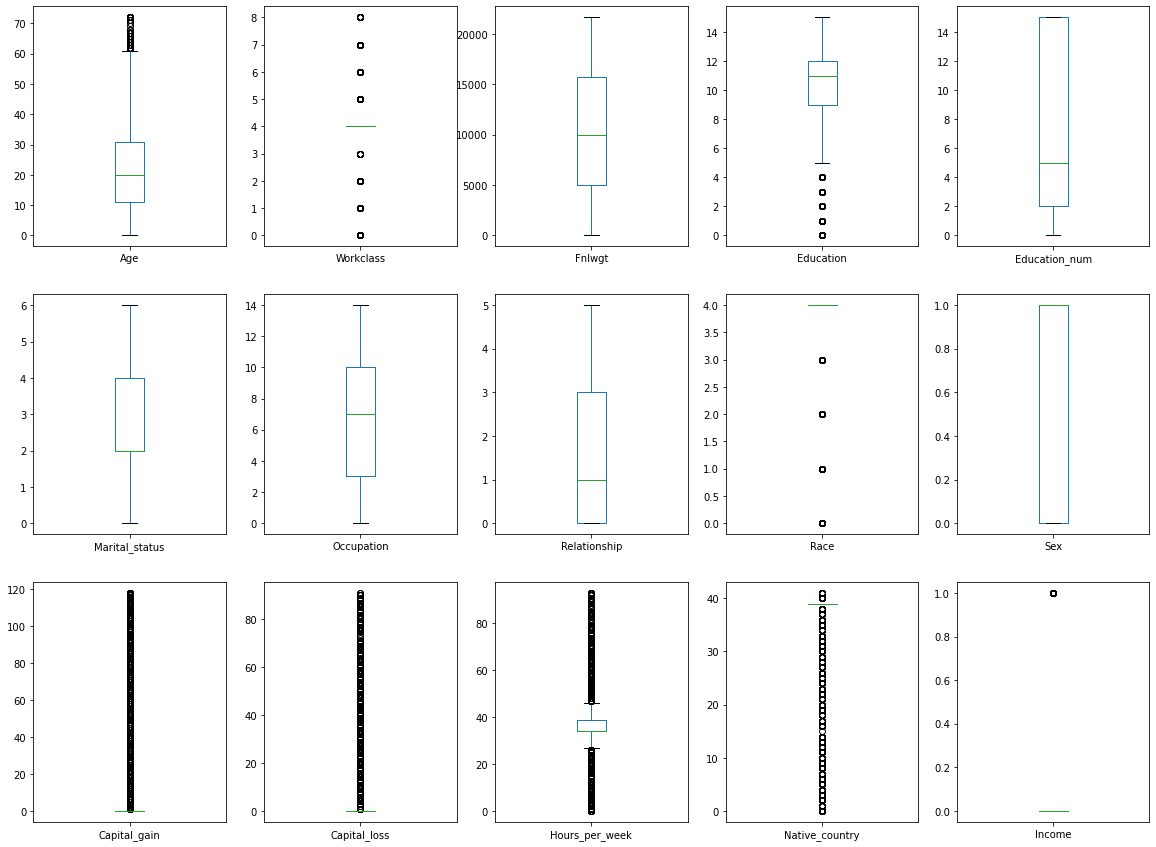

In [19]:
# to have all box plots in the same viz
df.plot(kind="box",subplots=True,layout=(3,5) , figsize=(20,15))

In [20]:
df["Capital_loss"].unique()

array([ 0, 46,  6, 39, 13, 38, 25, 32, 12, 55, 33, 43, 42, 37,  4, 58, 30,
        8, 65, 69,  5, 26, 47, 67, 23, 66, 24, 88, 68,  9, 44, 15, 21, 19,
       36, 29, 45, 14, 62, 17, 85, 75, 54, 57, 27, 70,  2, 60, 87, 51, 10,
       90, 22,  1, 16, 80, 59, 35, 89, 79, 76, 48, 41, 91, 52, 34, 28,  3,
       50, 77, 64, 81, 86, 61, 18, 20, 74, 83, 31, 82, 63, 49, 71, 11, 84,
       56, 40, 72, 53, 78, 73,  7])

<AxesSubplot:xlabel='Capital_loss'>

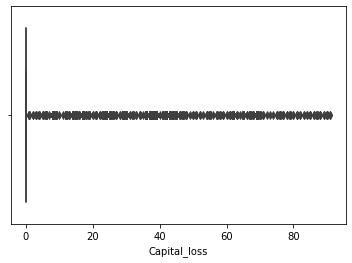

In [21]:
sns.boxplot(df["Capital_loss"])

<AxesSubplot:>

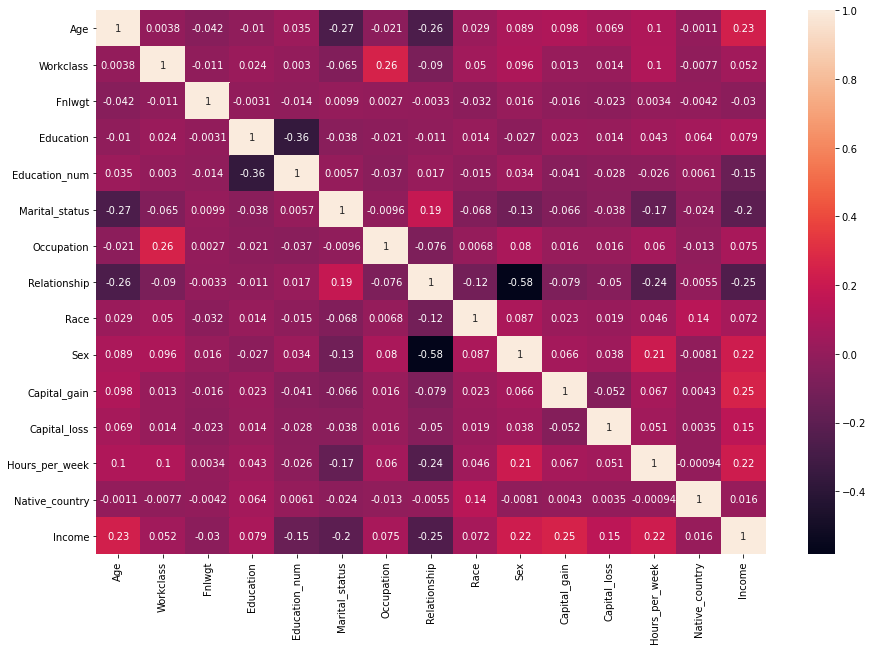

In [22]:
cor=df.corr()
plt.figure(figsize=(15,10))
sns.heatmap(cor,annot=True)

In [23]:
df.skew()

Age               0.555583
Workclass        -0.752280
Fnlwgt            0.116530
Education        -0.934063
Education_num     0.154439
Marital_status   -0.013448
Occupation        0.114540
Relationship      0.786784
Race             -2.435332
Sex              -0.719244
Capital_gain      3.959733
Capital_loss      5.704564
Hours_per_week    0.409786
Native_country   -3.658235
Income            1.212383
dtype: float64

In [24]:
df.keys()

Index(['Age', 'Workclass', 'Fnlwgt', 'Education', 'Education_num',
       'Marital_status', 'Occupation', 'Relationship', 'Race', 'Sex',
       'Capital_gain', 'Capital_loss', 'Hours_per_week', 'Native_country',
       'Income'],
      dtype='object')

5.7045640204534775


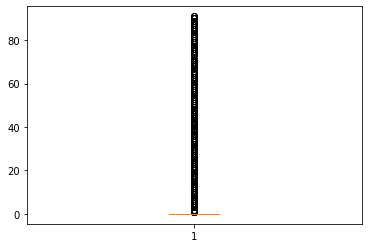

In [25]:
plt.boxplot(df["Capital_loss"])
print(df["Capital_loss"].skew())

5.7045640204534775


<AxesSubplot:xlabel='Capital_loss', ylabel='Density'>

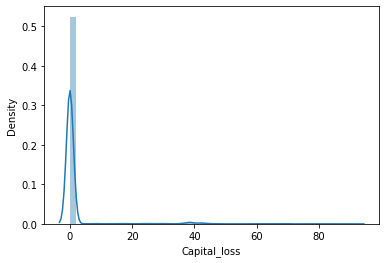

In [26]:
print(df["Capital_loss"].skew())
sns.distplot(df["Capital_loss"])

before treating  5.7045640204534775
After treating  4.753048991518766


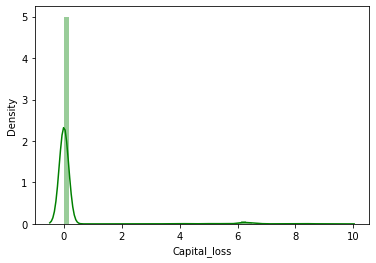

In [27]:
#removing outliers
print("before treating ",df["Capital_loss"].skew())
df["Capital_loss"]=np.sqrt(df["Capital_loss"])
sns.distplot(df["Capital_loss"],color="g")
print("After treating ",df["Capital_loss"].skew())

3.9597327757958896


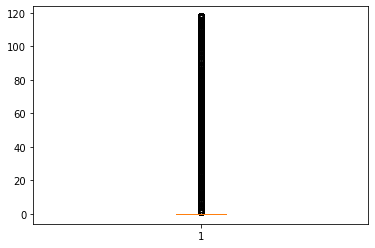

In [28]:
plt.boxplot(df["Capital_gain"])
print(df["Capital_gain"].skew())

3.9597327757958896


<AxesSubplot:xlabel='Capital_gain', ylabel='Density'>

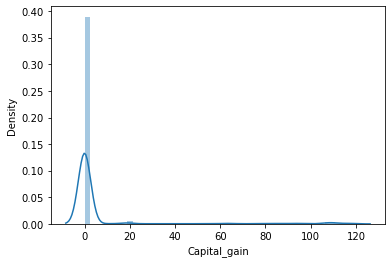

In [29]:
print(df["Capital_gain"].skew())
sns.distplot(df["Capital_gain"])

In [30]:
df.sample()

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
17615,10,2,9496,0,12,2,3,0,4,1,0,0.0,56,39,0


before treating  3.9597327757958896
After treating  3.4809137346510943


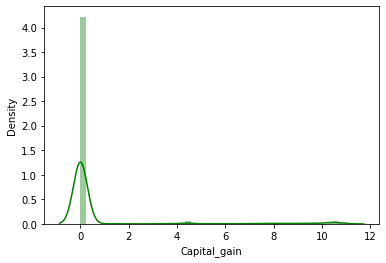

In [31]:
print("before treating ",df["Capital_gain"].skew())
df["Capital_gain"]=np.sqrt(df["Capital_gain"])
sns.distplot(df["Capital_gain"],color="g")
print("After treating ",df["Capital_gain"].skew())

In [32]:
#identifying outliers 
from scipy.stats import zscore
z=np.abs(zscore(df))
z

array([[0.83749664, 1.46388339, 1.6547912 , ..., 2.3833825 , 0.29157343,
        0.5632099 ],
       [0.042559  , 0.09012148, 0.01654487, ..., 0.07939419, 0.29157343,
        0.5632099 ],
       [1.05751055, 0.09012148, 0.18952564, ..., 0.07939419, 0.29157343,
        0.5632099 ],
       ...,
       [1.42420039, 0.09012148, 1.01755041, ..., 0.07939419, 0.29157343,
        0.5632099 ],
       [1.21596651, 0.09012148, 0.21331414, ..., 1.76898562, 0.29157343,
        0.5632099 ],
       [0.98417258, 0.77700244, 0.62636305, ..., 0.07939419, 0.29157343,
        1.77553698]])

In [33]:
#keeping the raw data and creating a new dataframe
dfn=df[(z<3).all(axis=1)]

In [34]:
#df=pd.read_csv("census_income.csv")

In [35]:
dfn.shape

(26760, 15)

In [36]:
df.shape

(32560, 15)

In [37]:
#CHECKING THE NEW DTAFRAME
dfn.skew()

Age                0.505455
Workclass         -0.758205
Fnlwgt             0.107094
Education         -0.943491
Education_num      0.102581
Marital_status    -0.082374
Occupation         0.134735
Relationship       0.718139
Race              -2.528912
Sex               -0.659690
Capital_gain       5.978960
Capital_loss      11.255523
Hours_per_week    -0.063670
Native_country    -5.120626
Income             1.466622
dtype: float64

In [38]:
df=pd.read_csv("census_income.csv")

In [39]:
column_list=[]
for i in df:
    column_list.append (i)
column_list



#encoding all the columns 
le=LabelEncoder()

for val in column_list:
    df[val]=le.fit_transform(df[val].astype(str))
    #astype describes that the data present are in str format
df

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
0,33,6,20690,9,4,2,4,0,4,1,0,0,4,39,0
1,21,4,10268,11,15,0,6,1,4,1,0,0,34,39,0
2,36,4,11553,1,13,2,6,0,2,1,0,0,34,39,0
3,11,4,16170,9,4,2,10,5,2,0,0,0,34,5,0
4,20,4,14135,12,5,2,4,5,4,0,0,0,34,39,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32555,10,4,12825,7,3,2,13,5,4,0,0,0,31,39,0
32556,23,4,4223,11,15,2,7,0,4,1,0,0,34,39,1
32557,41,4,4026,11,15,6,1,4,4,0,0,0,34,39,0
32558,5,4,9041,11,15,4,1,3,4,1,0,0,12,39,0


In [40]:
#identifying outliers 
from scipy.stats import zscore
z=np.abs(zscore(df))
#keeping the raw data and creating a new dataframe
dfn=df[(z<3).all(axis=1)]

In [41]:
df.shape   


(32560, 15)

In [42]:
dfn.shape

(27140, 15)

In [43]:
dfn.skew()

Age                0.504388
Workclass         -0.758403
Fnlwgt             0.106648
Education         -0.943450
Education_num      0.102846
Marital_status    -0.076263
Occupation         0.135402
Relationship       0.725529
Race              -2.531990
Sex               -0.664079
Capital_gain       6.423602
Capital_loss      10.339261
Hours_per_week    -0.064924
Native_country    -5.132407
Income             1.464836
dtype: float64

Age                  AxesSubplot(0.125,0.657941;0.133621x0.222059)
Workclass         AxesSubplot(0.285345,0.657941;0.133621x0.222059)
Fnlwgt             AxesSubplot(0.44569,0.657941;0.133621x0.222059)
Education         AxesSubplot(0.606034,0.657941;0.133621x0.222059)
Education_num     AxesSubplot(0.766379,0.657941;0.133621x0.222059)
Marital_status       AxesSubplot(0.125,0.391471;0.133621x0.222059)
Occupation        AxesSubplot(0.285345,0.391471;0.133621x0.222059)
Relationship       AxesSubplot(0.44569,0.391471;0.133621x0.222059)
Race              AxesSubplot(0.606034,0.391471;0.133621x0.222059)
Sex               AxesSubplot(0.766379,0.391471;0.133621x0.222059)
Capital_gain            AxesSubplot(0.125,0.125;0.133621x0.222059)
Capital_loss         AxesSubplot(0.285345,0.125;0.133621x0.222059)
Hours_per_week        AxesSubplot(0.44569,0.125;0.133621x0.222059)
Native_country       AxesSubplot(0.606034,0.125;0.133621x0.222059)
Income               AxesSubplot(0.766379,0.125;0.133621x0.222

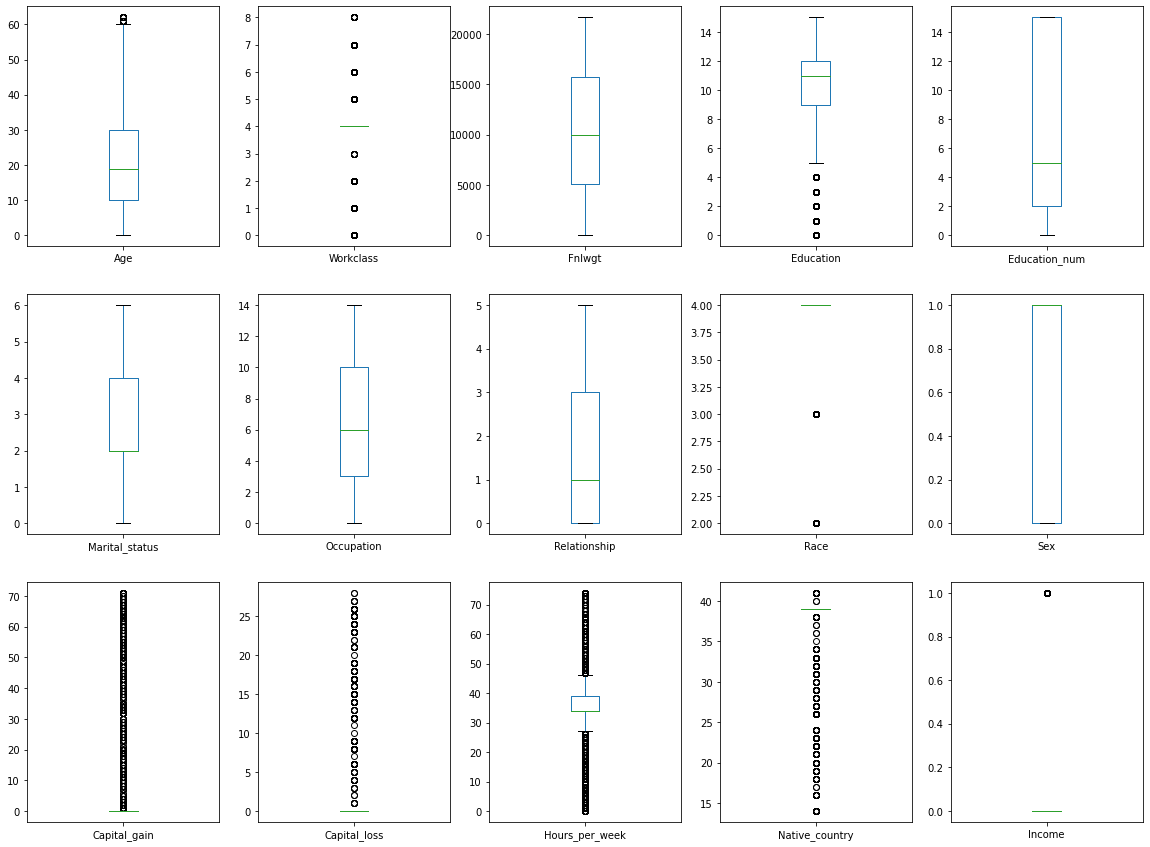

In [44]:
# to have all box plots in the same viz
dfn.plot(kind="box",subplots=True,layout=(3,5) , figsize=(20,15))

In [45]:
dfn.skew()

Age                0.504388
Workclass         -0.758403
Fnlwgt             0.106648
Education         -0.943450
Education_num      0.102846
Marital_status    -0.076263
Occupation         0.135402
Relationship       0.725529
Race              -2.531990
Sex               -0.664079
Capital_gain       6.423602
Capital_loss      10.339261
Hours_per_week    -0.064924
Native_country    -5.132407
Income             1.464836
dtype: float64

before treating  0.5043876594320456
After treating  -0.2917364515355815


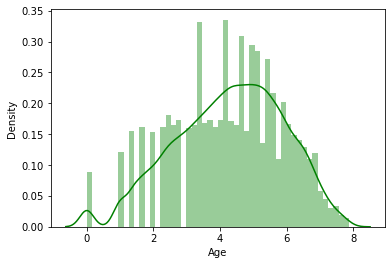

In [46]:
#treating the skewness 
print("before treating ",dfn["Age"].skew())
dfn["Age"]=np.sqrt(dfn["Age"])
sns.distplot(dfn["Age"],color="g")
print("After treating ",dfn["Age"].skew())

before treating  6.42360239778723
After treating  5.318510910800316


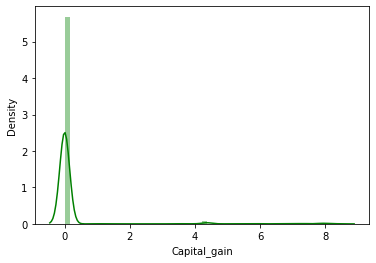

In [47]:
#treating the skewness 
print("before treating ",dfn["Capital_gain"].skew())
dfn["Capital_gain"]=np.sqrt(dfn["Capital_gain"])
sns.distplot(dfn["Capital_gain"],color="g")
print("After treating ",dfn["Capital_gain"].skew())

before treating  10.33926097093801
After treating  9.15492742829749


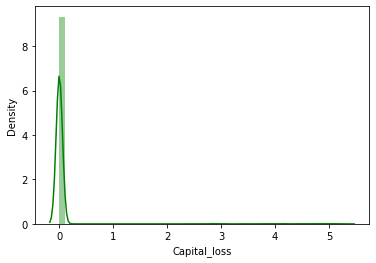

In [48]:
#treating the skewness 
print("before treating ",dfn["Capital_loss"].skew())
dfn["Capital_loss"]=np.sqrt(dfn["Capital_loss"])
sns.distplot(dfn["Capital_loss"],color="g")
print("After treating ",dfn["Capital_loss"].skew())

In [49]:
dfn.sample(5)

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
14096,6.480741,4,10155,4,9,0,7,4,4,0,0.0,0.0,34,39,0
11136,5.830952,4,6056,11,15,4,8,1,2,0,0.0,0.0,31,39,0
26697,4.358899,4,13617,9,4,4,8,1,4,0,0.0,0.0,34,39,0
28097,6.633250,4,2516,15,1,2,10,0,4,1,0.0,0.0,36,39,0
30673,5.656854,4,2170,11,15,2,12,0,4,1,0.0,0.0,34,39,0


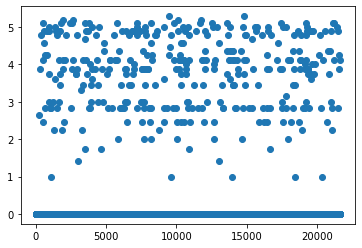

In [50]:
plt.scatter(dfn["Fnlwgt"],dfn["Capital_loss"])
plt.show()

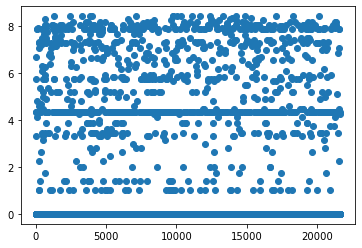

In [51]:
plt.scatter(dfn["Fnlwgt"],dfn["Capital_gain"])
plt.show()

In [52]:
cor=dfn.corr()

<AxesSubplot:>

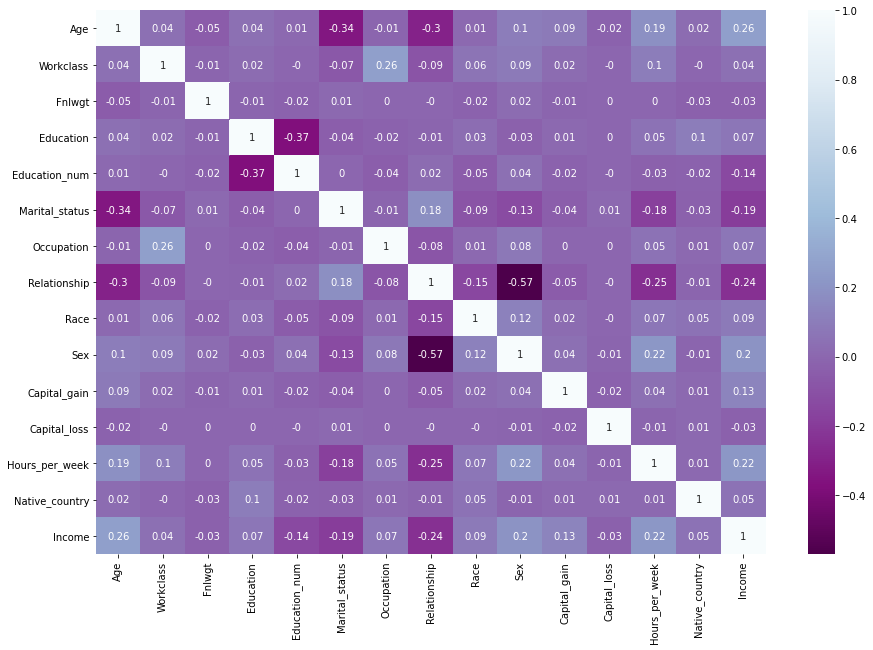

In [53]:
plt.figure(figsize=(15,10))
sns.heatmap(round(cor,2),annot=True,cmap="BuPu_r")

In [54]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
def calc_vif(ds):
    vif=pd.DataFrame()
    vif["variables"]=ds.columns
    vif["VIF FACTOR"]=[variance_inflation_factor (ds.values,i) for i in range (ds.shape[1])]
    return (vif)

In [55]:
calc_vif(dfn)

,variables,VIF FACTOR
0,Age,9.661796
1,Workclass,8.673968
2,Fnlwgt,3.739839
3,Education,9.154504
4,Education_num,3.281856
5,Marital_status,4.378938
6,Occupation,3.637253
7,Relationship,2.933257
8,Race,35.398642
9,Sex,4.377542


In [56]:
dfn.drop("Race",axis=1,inplace=True)

In [57]:
calc_vif(dfn)

,variables,VIF FACTOR
0,Age,9.654598
1,Workclass,8.587922
2,Fnlwgt,3.736329
3,Education,9.132062
4,Education_num,3.281102
5,Marital_status,4.376387
6,Occupation,3.637218
7,Relationship,2.933194
8,Sex,4.335458
9,Capital_gain,1.060160


In [58]:
dfn.drop("Native_country",axis=1,inplace=True)

In [59]:
calc_vif(dfn)

,variables,VIF FACTOR
0,Age,7.850731
1,Workclass,8.074659
2,Fnlwgt,3.579334
3,Education,7.459419
4,Education_num,3.016740
5,Marital_status,3.778755
6,Occupation,3.569884
7,Relationship,2.536854
8,Sex,4.053248
9,Capital_gain,1.060105


In [60]:
dfn.shape

(27140, 13)

<AxesSubplot:>

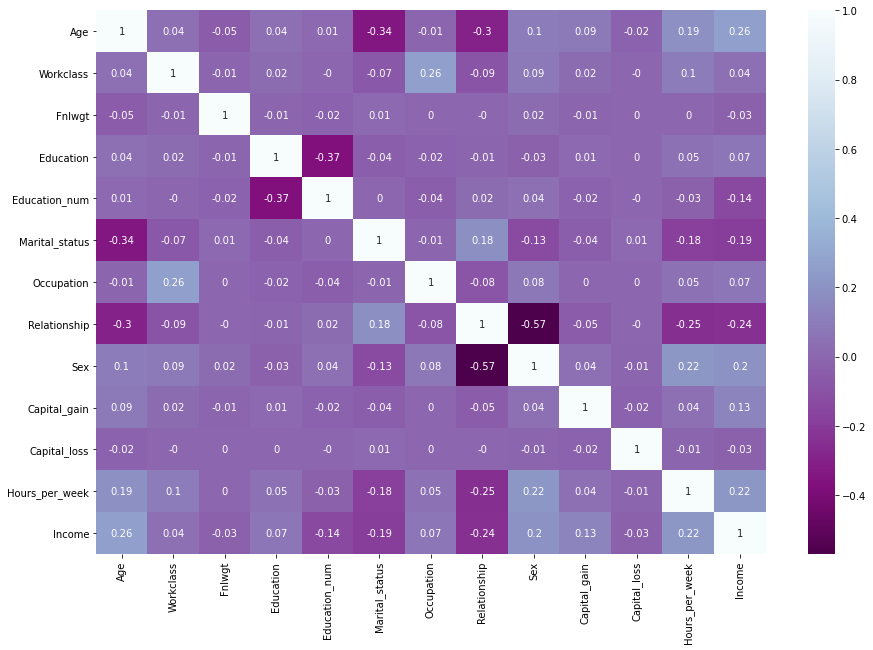

In [61]:
cor=dfn.corr()
plt.figure(figsize=(15,10))
sns.heatmap(round(cor,2),annot=True,cmap="BuPu_r")

In [62]:
# splitting  target 
x=dfn.drop("Fnlwgt",axis=1)
y=dfn["Fnlwgt"]


In [63]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split 

In [64]:
#saving best random state 
maxscor=0
maxRS=0
for i in range (1,50):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.30,random_state=i)
    from sklearn.linear_model import LinearRegression
    lm=LinearRegression()
    lm.fit(x_train,y_train)
    pred=lm.predict(x_test)
    sco=lm.score(x_train,y_train)
    if sco>maxscor:
        maxscor=sco
        maxRS=i

print("best accuracy  is ",maxscor*100, "with random state ",maxRS)

#note- code running before using PCA 

best accuracy  is  0.5901979149172232 with random state  25


In [65]:
 x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.30,random_state=25)

In [66]:
#linear regression 
from sklearn.linear_model import LinearRegression
lm=LinearRegression()
lm.fit(x_train,y_train)
pred=lm.predict(x_test)
lm_score=lm.score(x_train,y_train)*100
lm_score

0.5901979149172232

In [67]:
#Lasso 
from sklearn.linear_model import Lasso,Ridge
ls=Lasso(alpha=0.000001)
ls.fit(x_train,y_train)
pred=ls.predict(x_test)
ls_score=ls.score(x_train,y_train)*100
ls_score

0.5901979149172343

In [68]:
#Ridge 
rd=Ridge(alpha=0.000001)
rd.fit(x_train,y_train)
pred=rd.predict(x_test)
rd_score=rd.score(x_train,y_train)*100
rd_score

0.590197914917201

In [69]:
#elastic net
from sklearn.linear_model import ElasticNet
en=ElasticNet(alpha=0.000001)
en.fit(x_train,y_train)
pred=en.predict(x_test)
en_score=en.score(x_train,y_train)*100
en_score

0.590197914915358

In [70]:
print ("lm",lm_score)
print ("ls",ls_score)
print ("rd",rd_score)
print ("en",en_score)

lm 0.5901979149172232
ls 0.5901979149172343
rd 0.590197914917201
en 0.590197914915358


In [71]:
from sklearn.model_selection import GridSearchCV

In [72]:
parameters={"selection":["cyclic","random"],
            "copy_X":["true","false"],
             "random_state":np.arange(1,50),
           "max_iter":np.arange(1,5)}

In [73]:
GCV=GridSearchCV(ElasticNet(),parameters,cv=5)

In [74]:
en.get_params().keys()

dict_keys(['alpha', 'copy_X', 'fit_intercept', 'l1_ratio', 'max_iter', 'normalize', 'positive', 'precompute', 'random_state', 'selection', 'tol', 'warm_start'])

In [75]:
GCV.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=ElasticNet(),
             param_grid={'copy_X': ['true', 'false'],
                         'max_iter': array([1, 2, 3, 4]),
                         'random_state': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49]),
                         'selection': ['cyclic', 'random']})

In [76]:
GCV.best_params_

{'copy_X': 'true', 'max_iter': 2, 'random_state': 43, 'selection': 'random'}

In [77]:
##trying best params 
final_wgt=ElasticNet(copy_X="true", max_iter= 2, random_state=43,selection= 'random')
final_wgt.fit(x_train ,y_train)
pred=final_wgt.predict(x_test)
scoree=final_wgt.score(x_train,y_train)
print(scoree*100)

0.502347243996959


In [78]:
##final model selection  
#elastic net
final_model=ElasticNet(alpha=0.000001)
final_model.fit(x_train,y_train)
pred=final_model.predict(x_test)
final_model_score=final_model.score(x_train,y_train)*100
final_model_score

0.590197914915358

In [79]:
import joblib
joblib.dump(final_model,"final_wgt_model.pkl")

['final_wgt_model.pkl']